<a href="https://colab.research.google.com/github/fbghkh1999/Multi_predict_model_base-on-different-datasets/blob/main/phaze3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
% matplotlib inline

In [17]:
!unrar x "/content/drive/MyDrive/divar_dataset.rar" "/content/drive/MyDrive/divar_dataset/"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/divar_dataset.rar

Powered By CamelCase.ir :)
Enjoy Programming Tutorial With CamelCase.ir .


Would you like to replace the existing file /content/drive/MyDrive/divar_dataset/divar_posts_dataset.csv
267933697 bytes, modified on 2019-01-31 13:02
with a new one
267933697 bytes, modified on 2019-01-31 13:02

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit q

Program aborted


In [1]:
!unrar x "/content/drive/MyDrive/digikala_dataset.rar" "/content/drive/MyDrive/digikala_dataset/"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/digikala_dataset.rar

Creating    /content/drive/MyDrive/digikala_dataset                   OK
Extracting  /content/drive/MyDrive/digikala_dataset/product.xlsx           5% 10% 16% 17%  OK 
Extracting  /content/drive/MyDrive/digikala_dataset/tarikhche kharid.csv      22% 27% 33% 38% 43% 48%  OK 
Extracting  /content/drive/MyDrive/digikala_dataset/comment.xlsx          53% 58% 64% 69%  OK 
Extracting  /content/drive/MyDrive/digikala_dataset/keifiat.xlsx          69% 70% 71% 72% 73% 74% 75% 76% 77% 78% 79% 80% 81% 82% 83% 84% 85% 86% 87% 88% 89% 90% 91% 92% 93% 94%  OK 
Extracting  /content/drive/MyDrive/digikala_dataset/orders.csv            99%  OK 
All OK


In [2]:
divar=pd.read_csv('/content/drive/MyDrive/divar_dataset/divar_posts_dataset.csv')

In [3]:
divar.head()

,Unnamed: 0,archive_by_user,brand,cat1,cat2,cat3,city,created_at,desc,id,image_count,mileage,platform,price,title,type,year
0,0,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,کلاسیک و شیک و استثنایی\nچرم مالزی\nچوب راش\nف...,54761638662241,5,NaN,mobile,3850000,ست مبلمان و نهارخوری ٩ نفره,NaN,NaN
1,1,False,NaN,for-the-home,furniture-and-home-decore,antiques-and-art,Mashhad,Tuesday 07PM,"سلام,یک عدد گلدون نخل سه طبقه ی سالم دارم با پ...",42727631379133,1,NaN,mobile,30000,گلدون مصنوعی نخل,NaN,NaN
2,2,False,NaN,vehicles,cars,heavy,Mashhad,Tuesday 07PM,سریال 43j$NUMبدون شکستگی سه حلقه لاستیک نو یک ...,63194439667302,4,NaN,mobile,-1,لودر کاتر پیلار 950,NaN,NaN
3,3,False,NaN,for-the-home,furniture-and-home-decore,sofa-armchair,Tehran,Tuesday 07PM,مبل راحتی هفت نفره شامل سه نفره یک عدد دونفره ...,19133025491169,4,NaN,mobile,600000,مبل راحتی هفت نفره بامیز جلو مبلی,NaN,NaN
4,4,False,NaN,personal,baby-and-toys,personal-toys,Karaj,Tuesday 08PM,شارژی کنترلی سویچ حمل تا 35 کیلو صندلی برای دو...,58998998335444,2,NaN,mobile,450000,ماشین شارژی,NaN,NaN


In [5]:
divar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947635 entries, 0 to 947634
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       947635 non-null  int64  
 1   archive_by_user  947635 non-null  bool   
 2   brand            190892 non-null  object 
 3   cat1             947635 non-null  object 
 4   cat2             945877 non-null  object 
 5   cat3             775301 non-null  object 
 6   city             947635 non-null  object 
 7   created_at       947635 non-null  object 
 8   desc             947635 non-null  object 
 9   id               947635 non-null  int64  
 10  image_count      947635 non-null  int64  
 11  mileage          120451 non-null  float64
 12  platform         947635 non-null  object 
 13  price            947635 non-null  int64  
 14  title            947635 non-null  object 
 15  type             98529 non-null   object 
 16  year             120451 non-null  obje

In [4]:
divar_new=pd.concat([divar['city'],pd.get_dummies(divar[['cat1','cat2','cat3','brand']])],axis=1)

In [5]:
X=divar_new.groupby('city').sum()

In [6]:
X

,cat1_businesses,cat1_electronic-devices,cat1_for-the-home,cat1_leisure-hobbies,cat1_personal,cat1_vehicles,cat2_animals,cat2_audio-video,cat2_baby-and-toys,cat2_batch,cat2_bicycle,cat2_book-student-literature,cat2_building-and-garden,cat2_cars,cat2_childrens-clothing-and-shoe,cat2_clothing-and-shoes,cat2_computers,cat2_equipments-and-machinery,cat2_furniture-and-home-decore,cat2_game-consoles-and-video-games,cat2_health-beauty,cat2_hobby-collectibles,cat2_jewelry-and-watches,cat2_leisure-hobbies-toys,cat2_mobile-tablet,cat2_motorcycles,cat2_musical-instruments,cat2_parts-accessories,cat2_phone,cat2_sport-leisure,cat2_travel-packages,cat2_utensils-and-appliances,cat2_utility,cat3_accessories,cat3_antiques-and-art,cat3_ball-sports,cat3_barbershop-and-beautysalon,cat3_bathroom-wc-sauna,cat3_beds-bedroom,cat3_birds,...,brand_Huawei::هوآوی,brand_LG::ال‌جی,brand_Lenovo::لنوو,brand_MSI::ام‌اس‌آی,brand_Motorola::موتورلا,brand_Nokia::نوکیا,brand_Samsung::سامسونگ,brand_Sony Ericsson::سونی اریکسون,brand_Sony::سونی,brand_Suzuki::سوزوکی,brand_Toshiba::توشیبا,brand_ViewSonic::ویوسونیک,brand_ZTE::زدتی‌ای,brand_ام‌وی‌ام::MVM,brand_بنز::Mercedes-Benz,brand_بی‌ام‌و::BMW,brand_تندر ۹۰::Tondar 90,brand_تویوتا::Toyota,brand_تیبا::Tiba,brand_دوو::Daewoo,brand_رانا::Runna,brand_رنو::Renault,brand_زانتیا::Citroen Xantia,brand_سایر,brand_سمند::Samand,brand_غیره,brand_لیفان::Lifan,brand_نیسان::Nissan,brand_هیوندای (غیره)::Hyundai,brand_هیوندای سوناتا::Hyundai Sonata,brand_وانت,brand_پراید صندوق‌دار::Pride,brand_پراید هاچ‌بک::Pride,brand_پژو روآ / آر‌دی::RD/ROA,brand_پژو پارس::Peugeot Pars,brand_پژو ۲۰۶‍ صندوق‌دار::Peugeot 206,brand_پژو ۲۰۶‍::Peugeot 206,brand_پژو ۴۰۵::Peugeot 405,brand_پیکان::Peykan,brand_کیا::Kia
city,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ahvaz,2460.0,9411.0,16997.0,3816.0,4802.0,9677.0,2391.0,1100.0,670.0,606.0,990.0,0.0,1839.0,5699.0,0.0,3218.0,1557.0,1854.0,11507.0,1915.0,519.0,0.0,395.0,0.0,4839.0,698.0,0.0,3280.0,0.0,435.0,0.0,3187.0,464.0,0.0,1032.0,0.0,0.0,0.0,1126.0,2391.0,...,524.0,224.0,74.0,0.0,4.0,206.0,1719.0,35.0,200.0,0.0,0.0,0.0,144.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,373.0,531.0,0.0,0.0,1.0,333.0,0.0,0.0,1599.0,351.0,0.0,571.0,0.0,402.0,718.0,0.0,0.0
Isfahan,5198.0,11703.0,15719.0,8037.0,5199.0,15947.0,6493.0,1862.0,521.0,1003.0,1012.0,0.0,892.0,9940.0,0.0,3644.0,1476.0,4195.0,11097.0,2085.0,623.0,0.0,411.0,0.0,6280.0,1974.0,0.0,4033.0,0.0,532.0,0.0,3248.0,482.0,692.0,1390.0,0.0,0.0,0.0,955.0,5214.0,...,612.0,263.0,162.0,0.0,7.0,372.0,1747.0,83.0,268.0,0.0,0.0,1.0,140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,777.0,813.0,80.0,0.0,373.0,0.0,0.0,344.0,2179.0,610.0,466.0,957.0,0.0,767.0,867.0,620.0,0.0
Karaj,6204.0,14378.0,28208.0,4906.0,11996.0,18044.0,3308.0,2841.0,2157.0,862.0,918.0,0.0,1461.0,11541.0,921.0,7359.0,2556.0,5342.0,20359.0,2459.0,866.0,0.0,693.0,0.0,6522.0,951.0,0.0,5552.0,0.0,680.0,0.0,5644.0,744.0,619.0,2449.0,0.0,447.0,0.0,1547.0,2267.0,...,718.0,219.0,258.0,12.0,11.0,340.0,1862.0,97.0,508.0,0.0,11.0,2.0,120.0,366.0,0.0,0.0,0.0,0.0,380.0,0.0,0.0,0.0,0.0,718.0,919.0,82.0,0.0,381.0,0.0,0.0,508.0,3241.0,641.0,516.0,604.0,0.0,1028.0,1184.0,571.0,0.0
Kermanshah,1587.0,4557.0,5963.0,779.0,4077.0,6167.0,779.0,496.0,0.0,372.0,0.0,0.0,0.0,3003.0,422.0,3655.0,0.0,1215.0,5323.0,1105.0,0.0,0.0,0.0,0.0,2956.0,378.0,0.0,2786.0,0.0,0.0,0.0,640.0,0.0,0.0,768.0,0.0,0.0,0.0,395.0,779.0,...,348.0,107.0,71.0,0.0,9.0,281.0,1039.0,47.0,223.0,0.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,362.0,0.0,0.0,0.0,0.0,0.0,0.0,961.0,0.0,0.0,457.0,0.0,0.0,497.0,0.0,0.0
Mashhad,8097.0,23199.0,40845.0,16177.0,24662.0,25899.0,12247.0,3761.0,2971.0,1346.0,1860.0,801.0,3563.0,16014.0,3155.0,16130.0,3921.0,6751.0,27146.0,3484.0,1083.0,398.0,1323.0,0.0,11686.0,2330.0,0.0,7555.0,0.0,871.0,0.0,8877.0,1259.0,1045.0,4212.0,0.0,502.0,0.0,2152.0,10006.0,...,1456.0,532.0,479.0,17.0,37.0,553.0,3402.0,168.0,816.0,0.0,15.0,2.0,357.0,729.0,0.0,0.0,373.0,0.0,478.0,0.0,0.0,0.0,0.0,1198.0,116

In [10]:
X.isnull().sum()

cat1_businesses                          0
cat1_electronic-devices                  0
cat1_for-the-home                        0
cat1_leisure-hobbies                     0
cat1_personal                            0
                                        ..
brand_پژو ۲۰۶‍ صندوق‌دار::Peugeot 206    0
brand_پژو ۲۰۶‍::Peugeot 206              0
brand_پژو ۴۰۵::Peugeot 405               0
brand_پیکان::Peykan                      0
brand_کیا::Kia                           0
Length: 152, dtype: int64

In [10]:
from sklearn.cluster  import  DBSCAN
cluster=DBSCAN(eps=10, min_samples=5)
cluster.fit(X)
cluster.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1])

In [13]:
from sklearn.cluster import KMeans
kmeans_evaluation=[]
for k in range(1,10):
  km= KMeans(n_clusters=k,random_state=44)
  km.fit(X)
  kmeans_evaluation.append(km.inertia_)

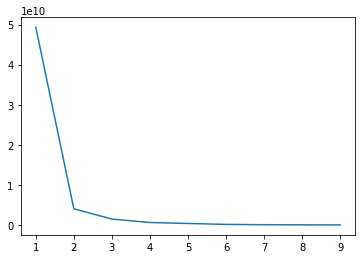

In [14]:
plt.plot(np.arange(1,10),kmeans_evaluation)
plt.show()

In [15]:
#k=3
km= KMeans(n_clusters=3,random_state=44)
km.fit(X)
predict=km.predict(X)




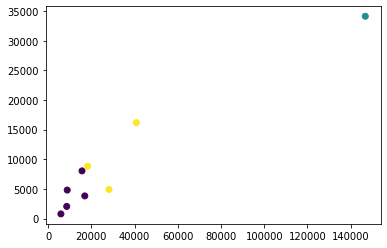

In [16]:
predict
V=np.array(X)
plt.scatter(V[:,2],V[:,3],c=predict)
plt.show()

In [17]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3)
yhat = model.fit_predict(X)
clusters = np.unique(yhat)

clusters
yhat

array([2, 2, 0, 2, 0, 2, 0, 2, 1])

# part 2

In [18]:
digikala=pd.read_csv('/content/drive/MyDrive/digikala_dataset/orders.csv')

In [19]:
digikala.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0


In [20]:
Cities=['اهواز','اصفهان', 'قم','تهران','کرج','کرمانشاه','مشهد','شیراز','تبریز']
digi_new=digikala.loc[digikala['city_name_fa'].isin(Cities)]

In [21]:
digi_kalaa=pd.concat([digi_new.loc[:6000,'city_name_fa'],pd.get_dummies(digi_new.loc[:6000,'ID_Item'])],axis=1).groupby('city_name_fa').sum()

In [22]:
from sklearn.cluster import KMeans
kmeans_evaluation3=[]
for k in range(1,10):
  km= KMeans(n_clusters=k,random_state=44)
  km.fit(digi_kalaa)
  kmeans_evaluation3.append(km.inertia_)

In [45]:
 km= KMeans(n_clusters=3,random_state=44)
km.fit(digi_kalaa)
per_dig=km.predict(digi_kalaa)

In [63]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3)
yhat1 = model.fit_predict(digi_kalaa)
per_dig2 = np.unique(yhat1)

In [65]:
yhat1

array([0, 0, 0, 1, 0, 0, 2, 0, 0])

In [66]:
per_dig

array([0, 0, 0, 1, 0, 0, 2, 0, 0], dtype=int32)

# part3

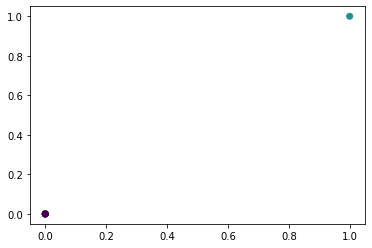

In [33]:
dig=np.array(digi_kalaa)
plt.scatter(dig[:,5],dig[:,6],c=per_dig)
plt.show()

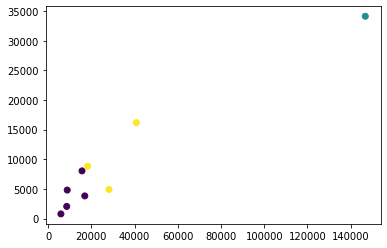

In [34]:
predict
V=np.array(X)
plt.scatter(V[:,2],V[:,3],c=predict)
plt.show()

In [47]:
#divar
divar_plot=pd.concat([pd.DataFrame(X.index),pd.DataFrame(predict)],axis=1)

In [48]:
dig_plot=pd.concat([pd.DataFrame(digi_kalaa.index),pd.DataFrame(per_dig)],axis=1)

[]

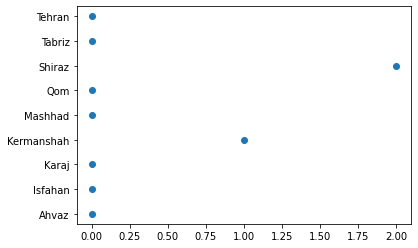

In [59]:
plt.scatter(dig_plot[0],divar_plot['city'])
plt.plot()

[]

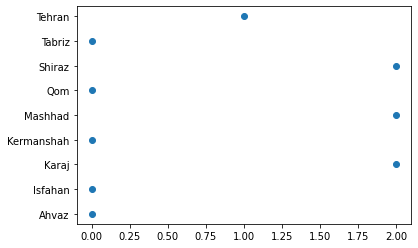

In [61]:
plt.scatter(divar_plot[0],divar_plot['city'])
plt.plot()

In [60]:
divar_plot

,city,0
0,Ahvaz,0
1,Isfahan,0
2,Karaj,2
3,Kermanshah,0
4,Mashhad,2
5,Qom,0
6,Shiraz,2
7,Tabriz,0
8,Tehran,1


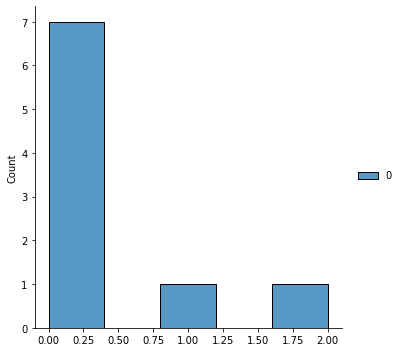

In [54]:
sns.displot(dig_plot)

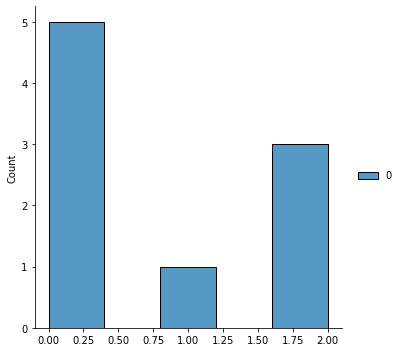

In [55]:
sns.displot(divar_plot)

#PART4

In [68]:
X_price=divar.groupby('cat2')['price'].mean()

In [69]:
np.array(X_price)

array([1.08965166e+05, 3.59862910e+05, 1.54017290e+05, 1.22520562e+04,
       3.28706415e+05, 2.13364714e+04, 2.36240988e+05, 2.22471836e+07,
       2.87591087e+04, 7.83570423e+04, 3.42024685e+05, 9.04246931e+05,
       4.33065930e+05, 2.07096754e+05, 8.86621561e+04, 2.38793125e+05,
       2.44155529e+05, 2.86667877e+05, 5.35765761e+05, 2.58068106e+06,
       9.25178511e+05, 1.91985748e+05, 9.59874719e+04, 3.97949671e+05,
       2.86133549e+05, 2.91505069e+05, 2.26326655e+05])

In [70]:
from sklearn.cluster import AgglomerativeClustering
model4 = AgglomerativeClustering(n_clusters=2)
yhat4 = model.fit_predict(np.array(X_price).reshape(-1,1))
yhat4



array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0])

In [71]:
from sklearn.cluster import KMeans
kmeans_evaluation4=[]
for k in range(1,5):
  km= KMeans(n_clusters=k,random_state=44)
  km.fit(np.array(X_price).reshape(-1,1))
  kmeans_evaluation4.append(km.inertia_)

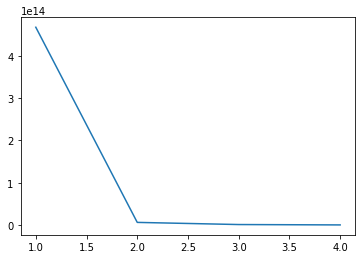

In [72]:
plt.plot(np.arange(1,5),kmeans_evaluation4)
plt.show()

In [73]:
km= KMeans(n_clusters=3,random_state=44)
km.fit(np.array(X_price).reshape(-1,1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=44, tol=0.0001, verbose=0)

In [74]:
price_label=km.predict(np.array(X_price).reshape(-1,1))

In [79]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3)
price_label2 = model.fit_predict(np.array(X_price).reshape(-1,1))


In [80]:
price_label2

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0])